# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'lifeexpectancy'<br>
table_name = 'lifeexpectancy'<br>

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpect_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [2]:
lifeexpect_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Cleaning

In [3]:
lifeexpect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

There seem to be some missing, so we will discuss missing value.

### Calculate the percentages of the missing values in all columns

In [4]:
## Strip space in the columns
lifeexpect_df.columns = lifeexpect_df.columns.str.strip()

In [5]:
strPerc = 'Variable\tPercentMissing\n'
countryList = lifeexpect_df['Country'].unique()
for variable in lifeexpect_df.columns :
    strPerc += "{}\t{}\n".format(variable, lifeexpect_df[variable].isnull().sum()*100/lifeexpect_df[variable].isnull().count())  

In [6]:
strPerc
df = pd.DataFrame([x.split('\t') for x in strPerc.split('\n')])
header = df.iloc[0]
df = df[1:]
df = df.rename(columns = header)
df = df.dropna()
df

,Variable,PercentMissing
1,Country,0.0
2,Year,0.0
3,Status,0.0
4,Life expectancy,0.34036759700476515
5,Adult Mortality,0.34036759700476515
6,infant deaths,0.0
7,Alcohol,6.603131381892444
8,percentage expenditure,0.0
9,Hepatitis B,18.82232811436351
10,Measles,0.0


Population, Hepatitis B, and GDP variables have a huge number of missing values (22%, 18%, and 15% respectively)

### Approaches to handling missing values

The data is time series, each country has own value range on every variable. Taking the mean or median value to fill in missing value should be dangerous. So, we take **linear interpolation** method to fill missing values.

In [7]:
# Taking fill list that has missing values
fillList = list(lifeexpect_df.columns[lifeexpect_df.isnull().sum()*100/lifeexpect_df.isnull().count() > 0])

In [8]:
# Filling null values using interpolation.
for country in countryList:
    lifeexpect_df.loc[lifeexpect_df['Country'] == country,fillList] = lifeexpect_df.loc[lifeexpect_df['Country'] == country,fillList].interpolate()
# Drop remaining null values after interpolation.
lifeexpect_df.dropna(inplace=True)

In [9]:
lifeexpect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1987 non-null object
Year                               1987 non-null int64
Status                             1987 non-null object
Life expectancy                    1987 non-null float64
Adult Mortality                    1987 non-null float64
infant deaths                      1987 non-null int64
Alcohol                            1987 non-null float64
percentage expenditure             1987 non-null float64
Hepatitis B                        1987 non-null float64
Measles                            1987 non-null int64
BMI                                1987 non-null float64
under-five deaths                  1987 non-null int64
Polio                              1987 non-null float64
Total expenditure                  1987 non-null float64
Diphtheria                         1987 non-null float64
HIV/AIDS                           1987 non-null

In [10]:
# Taking numerical columns
columnList = list(lifeexpect_df.columns)
columnList.remove('Year')
columnList.remove('Status')

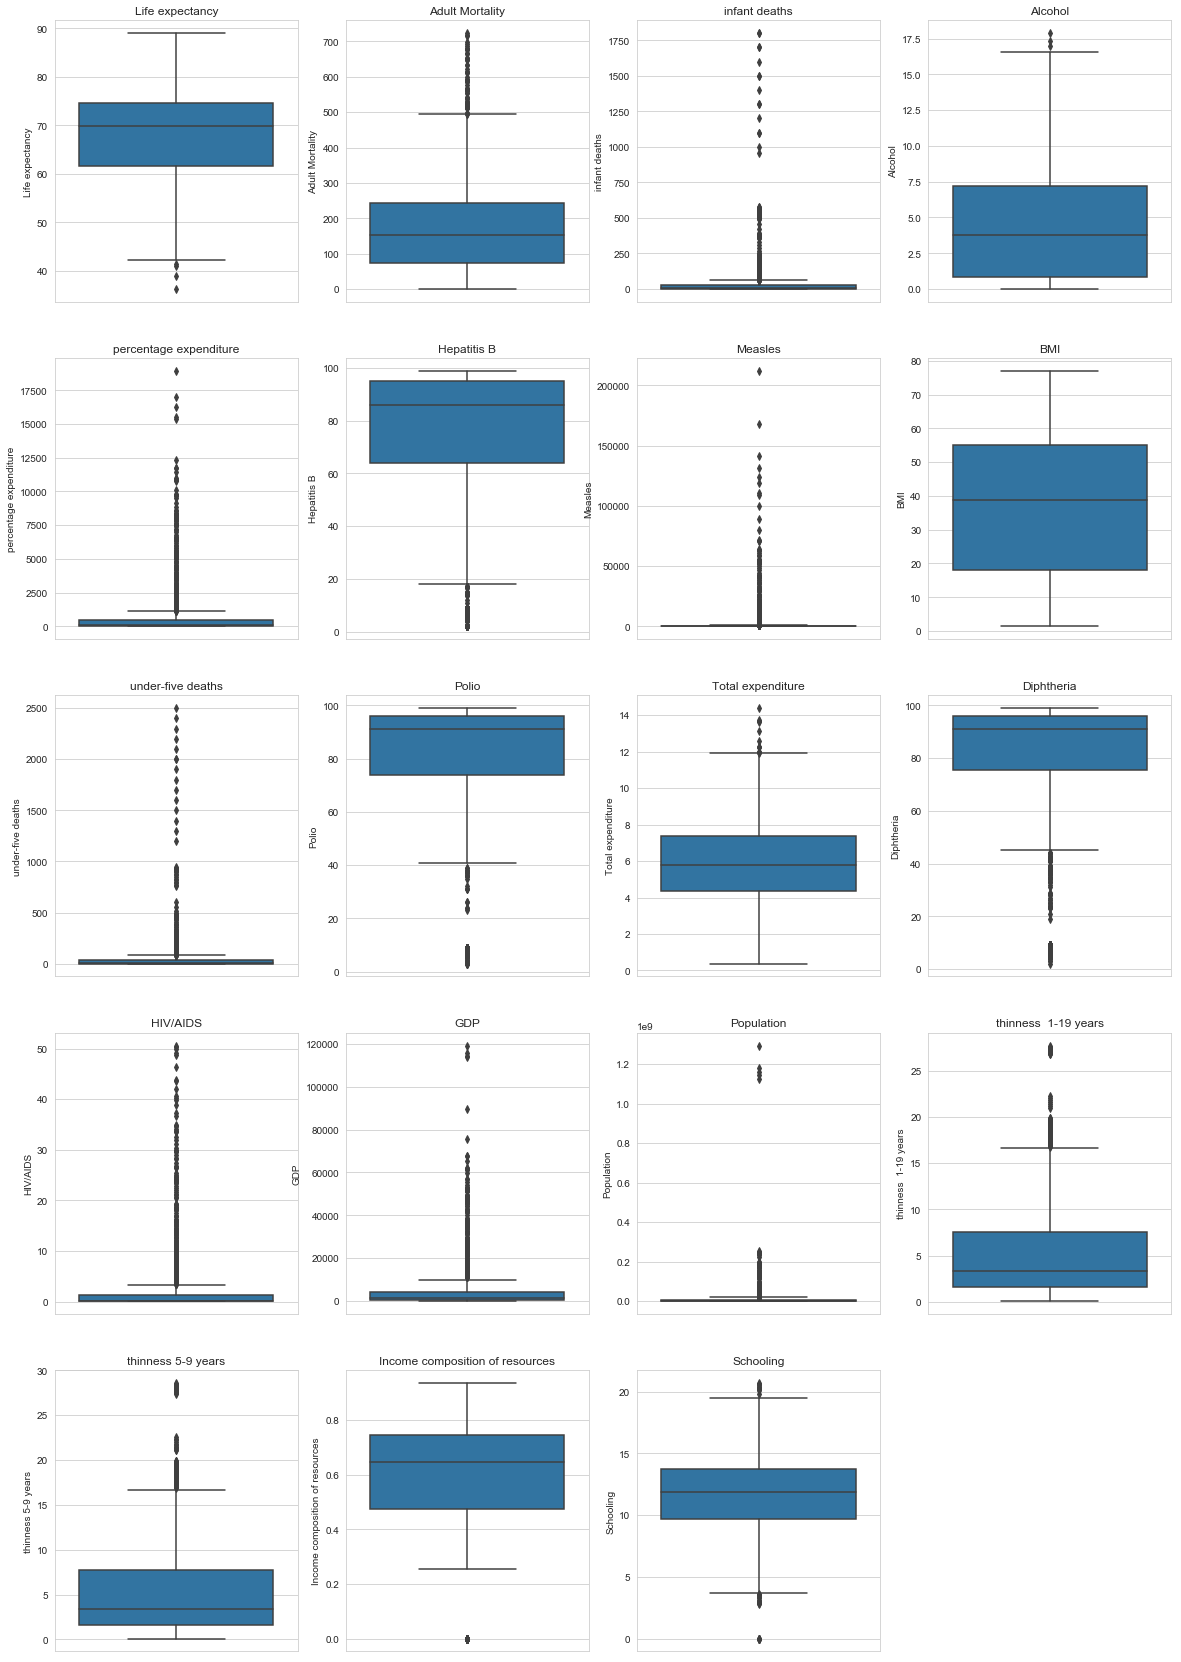

In [11]:
# Plotting Boxplots for every columns
plt.figure(figsize=(20,30))
for i in range(1, len(columnList)):
    plt.subplot(5,4,i)
    sns.boxplot(lifeexpect_df["%s" % columnList[i]],whis=1.5, orient='v')
    plt.title(columnList[i])
plt.show()

According to botplots, there are many outliers on most of variables. Let's calculate outliers and its percentage with respect to each variable. 

### Tukey's method

In [12]:
strVal = ''
strVal+= "Variable\tThreshold\tNum_outlier\tpercent_outlier\n"
for i in range(1,len(columnList)):
    q75, q25 = np.percentile(lifeexpect_df[columnList[i]], [75 ,25])
    iqr = q75 - q25
    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        strVal += "{}\t{}\t{}\t{}\n".format(columnList[i],threshold,len((np.where((lifeexpect_df[columnList[i]] > max_val) | 
                                                                                           (lifeexpect_df[columnList[i]] < min_val))[0])),len((np.where((lifeexpect_df[columnList[i]] > max_val) | 
                                                                                           (lifeexpect_df[columnList[i]] < min_val))[0]))*100/len(lifeexpect_df))    

In [13]:
df = pd.DataFrame([x.split('\t') for x in strVal.split('\n')])
header = df.iloc[0]
df = df[1:]
df = df.rename(columns = header)
df.head()

,Variable,Threshold,Num_outlier,percent_outlier
1,Life expectancy,1.0,106,5.334675390035229
2,Life expectancy,1.5,4,0.20130850528434827
3,Life expectancy,2.0,0,0.0
4,Life expectancy,2.5,0,0.0
5,Life expectancy,3.0,0,0.0


In [14]:
df = df.dropna()
df['Threshold'] = df['Threshold'].astype('float64')
df['Num_outlier'] = df['Num_outlier'].astype('float64')
df['percent_outlier'] = df['percent_outlier'].astype('float64')

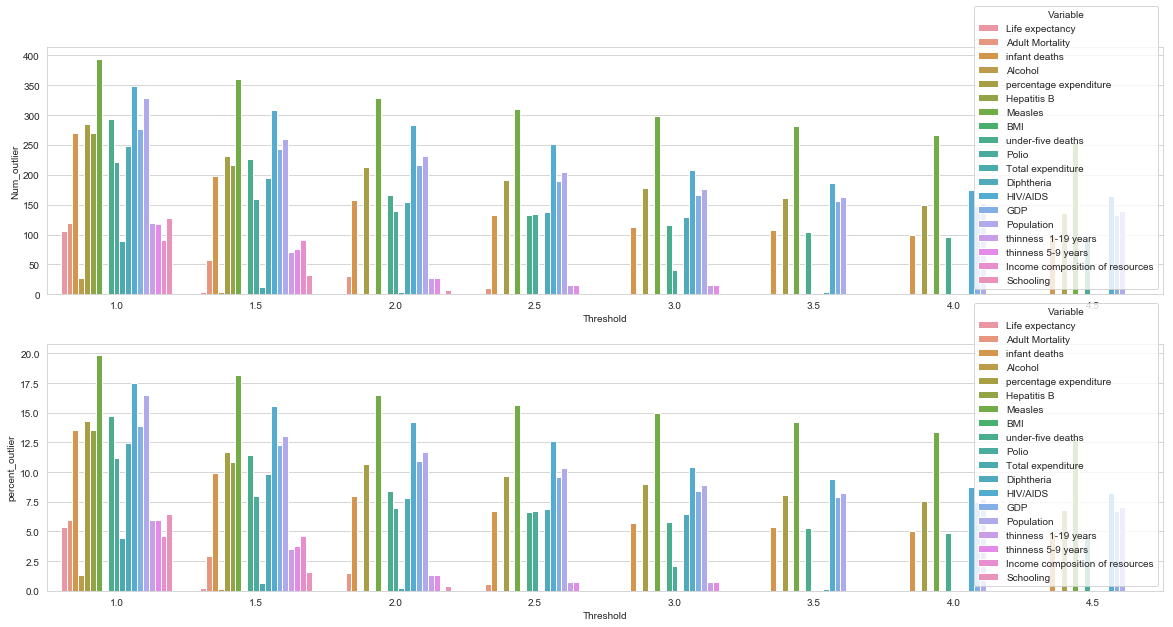

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x='Threshold', y='Num_outlier', hue='Variable', data=df)
plt.subplot(2,1,2)
sns.barplot(x='Threshold', y='percent_outlier', hue='Variable', data=df)
plt.show()

When the threshold is **Interquartile Range (1.5)**, There are still outliers in the data. Just take this threshold, because if the threshold is strict, we can lose many data.

### Limiting the values of the outliers (Winsorization)

In [16]:
from scipy.stats.mstats import winsorize

In [17]:
lifeexpect_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

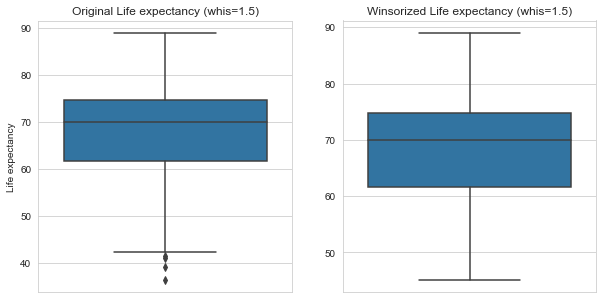

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Life expectancy"], orient = 'v')
plt.title("Original Life expectancy (whis=1.5)")
winsorized_lifeExp = winsorize(lifeexpect_df["Life expectancy"], (0.01, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_lifeExp, orient = 'v')
plt.title("Winsorized Life expectancy (whis=1.5)")
plt.show()

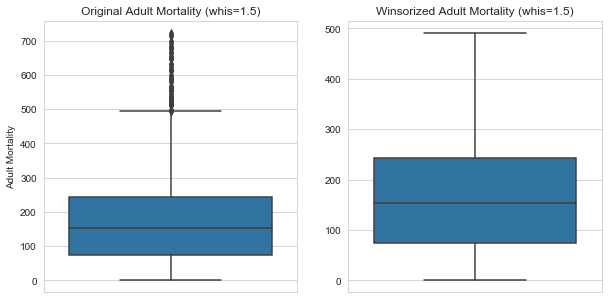

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Adult Mortality"], orient = 'v')
plt.title("Original Adult Mortality (whis=1.5)")
winsorized_AdultMort = winsorize(lifeexpect_df["Adult Mortality"], (0, 0.03))
plt.subplot(1,2,2)
sns.boxplot(winsorized_AdultMort, orient = 'v')
plt.title("Winsorized Adult Mortality (whis=1.5)")
plt.show()

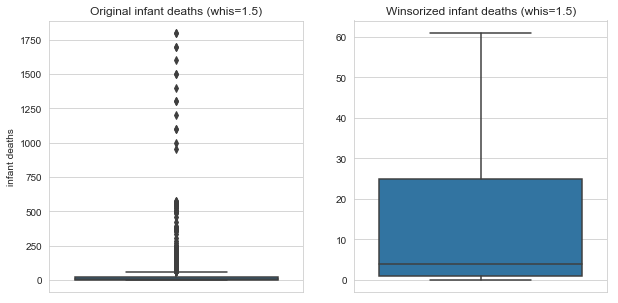

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["infant deaths"], orient = 'v')
plt.title("Original infant deaths (whis=1.5)")
winsorized_infantDeath = winsorize(lifeexpect_df["infant deaths"], (0, 0.1))
plt.subplot(1,2,2)
sns.boxplot(winsorized_infantDeath, orient = 'v')
plt.title("Winsorized infant deaths (whis=1.5)")
plt.show()

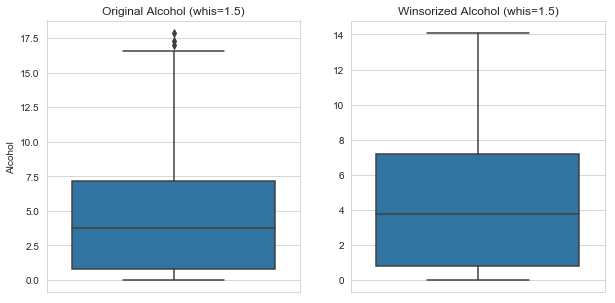

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Alcohol"], orient = 'v')
plt.title("Original Alcohol (whis=1.5)")
winsorized_Alcohol = winsorize(lifeexpect_df["Alcohol"], (0, 0.01))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Alcohol, orient = 'v')
plt.title("Winsorized Alcohol (whis=1.5)")
plt.show()

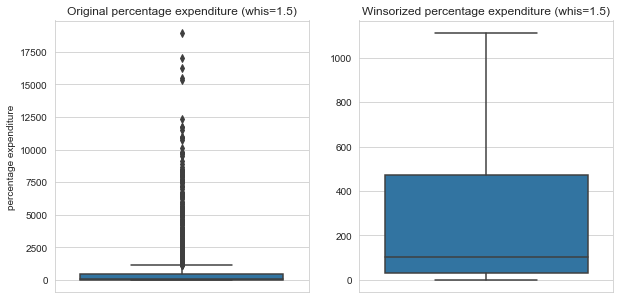

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["percentage expenditure"], orient = 'v')
plt.title("Original percentage expenditure (whis=1.5)")
winsorized_Expenditure = winsorize(lifeexpect_df["percentage expenditure"], (0, 0.12))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Expenditure, orient = 'v')
plt.title("Winsorized percentage expenditure (whis=1.5)")
plt.show()

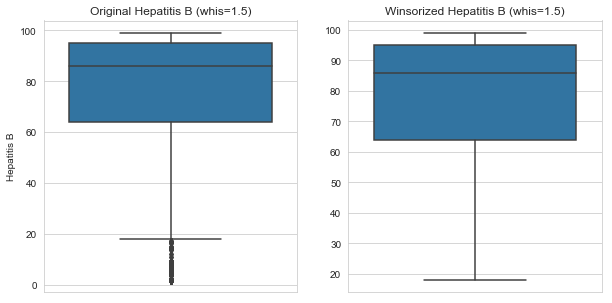

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Hepatitis B"], orient = 'v')
plt.title("Original Hepatitis B (whis=1.5)")
winsorized_HepB = winsorize(lifeexpect_df["Hepatitis B"], (0.11, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_HepB, orient = 'v')
plt.title("Winsorized Hepatitis B (whis=1.5)")
plt.show()

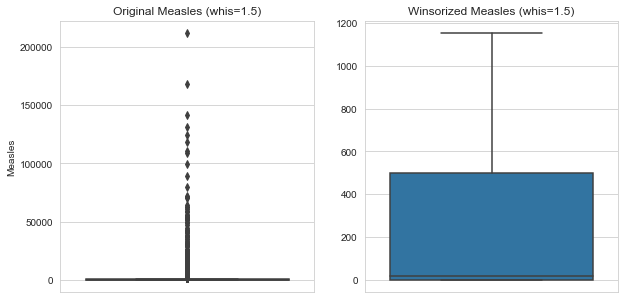

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Measles"], orient = 'v')
plt.title("Original Measles (whis=1.5)")
winsorized_Measles = winsorize(lifeexpect_df["Measles"], (0, 0.19))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Measles, orient = 'v')
plt.title("Winsorized Measles (whis=1.5)")
plt.show()

There is a huge change in this variable when it has winsorized, so we exclude this variable in the analysis.

In [25]:
lifeexpect_df = lifeexpect_df.drop('Measles',axis=1)

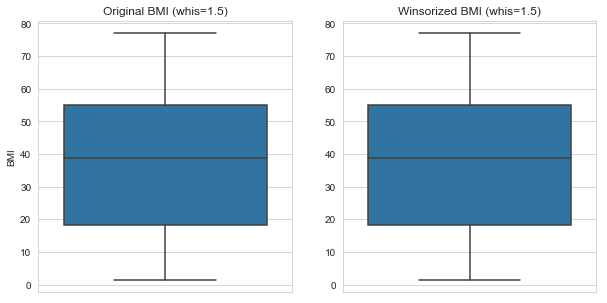

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["BMI"], orient = 'v')
plt.title("Original BMI (whis=1.5)")
winsorized_BMI = winsorize(lifeexpect_df["BMI"], (0, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_BMI, orient = 'v')
plt.title("Winsorized BMI (whis=1.5)")
plt.show()

BMI doesn't have any outliers.

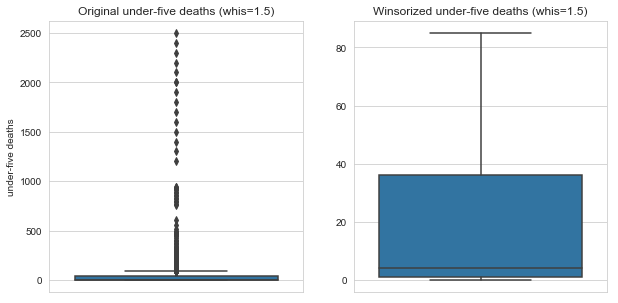

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["under-five deaths"], orient = 'v')
plt.title("Original under-five deaths (whis=1.5)")
winsorized_underFive = winsorize(lifeexpect_df["under-five deaths"], (0, 0.12))
plt.subplot(1,2,2)
sns.boxplot(winsorized_underFive, orient = 'v')
plt.title("Winsorized under-five deaths (whis=1.5)")
plt.show()

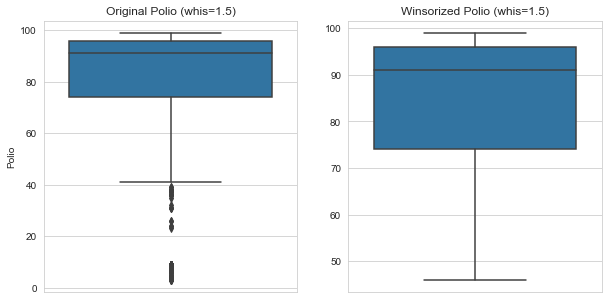

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Polio"], orient = 'v')
plt.title("Original Polio (whis=1.5)")
winsorized_Polio = winsorize(lifeexpect_df["Polio"], (0.1, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Polio, orient = 'v')
plt.title("Winsorized Polio (whis=1.5)")
plt.show()

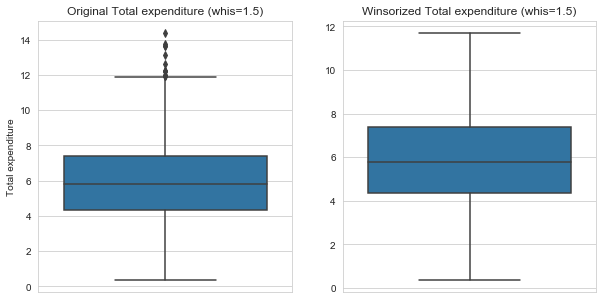

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Total expenditure"], orient = 'v')
plt.title("Original Total expenditure (whis=1.5)")
winsorized_TotExpenditure = winsorize(lifeexpect_df["Total expenditure"], (0, 0.01))
plt.subplot(1,2,2)
sns.boxplot(winsorized_TotExpenditure, orient = 'v')
plt.title("Winsorized Total expenditure (whis=1.5)")
plt.show()

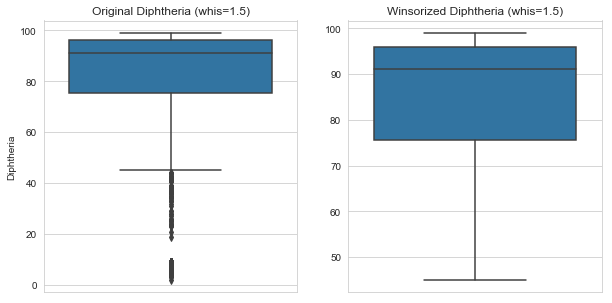

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Diphtheria"], orient = 'v')
plt.title("Original Diphtheria (whis=1.5)")
winsorized_Diphtheria = winsorize(lifeexpect_df["Diphtheria"], (0.1, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Diphtheria, orient = 'v')
plt.title("Winsorized Diphtheria (whis=1.5)")
plt.show()

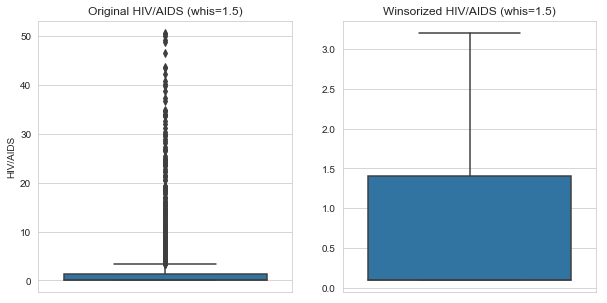

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["HIV/AIDS"], orient = 'v')
plt.title("Original HIV/AIDS (whis=1.5)")
winsorized_HIV = winsorize(lifeexpect_df["HIV/AIDS"], (0, 0.16))
plt.subplot(1,2,2)
sns.boxplot(winsorized_HIV, orient = 'v')
plt.title("Winsorized HIV/AIDS (whis=1.5)")
plt.show()

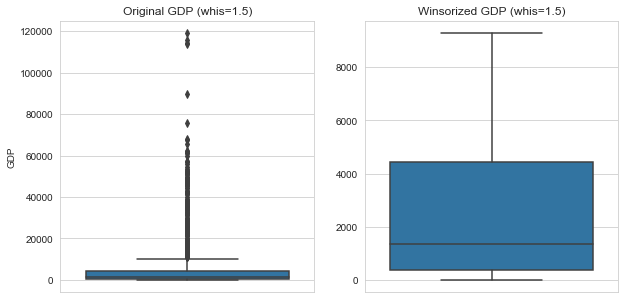

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["GDP"], orient = 'v')
plt.title("Original GDP (whis=1.5)")
winsorized_GDP = winsorize(lifeexpect_df["GDP"], (0, 0.13))
plt.subplot(1,2,2)
sns.boxplot(winsorized_GDP, orient = 'v')
plt.title("Winsorized GDP (whis=1.5)")
plt.show()

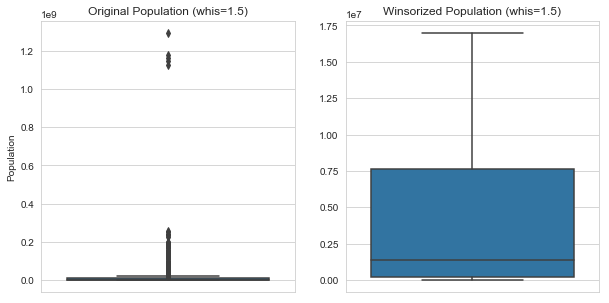

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Population"], orient = 'v')
plt.title("Original Population (whis=1.5)")
winsorized_Popu = winsorize(lifeexpect_df["Population"], (0, 0.14))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Popu, orient = 'v')
plt.title("Winsorized Population (whis=1.5)")
plt.show()

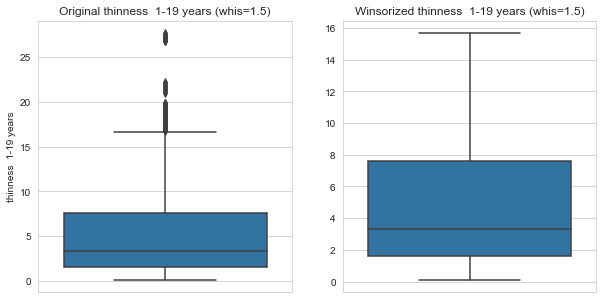

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["thinness  1-19 years"], orient = 'v')
plt.title("Original thinness  1-19 years (whis=1.5)")
winsorized_thin_1_19 = winsorize(lifeexpect_df["thinness  1-19 years"], (0, 0.04))
plt.subplot(1,2,2)
sns.boxplot(winsorized_thin_1_19, orient = 'v')
plt.title("Winsorized thinness  1-19 years (whis=1.5)")
plt.show()

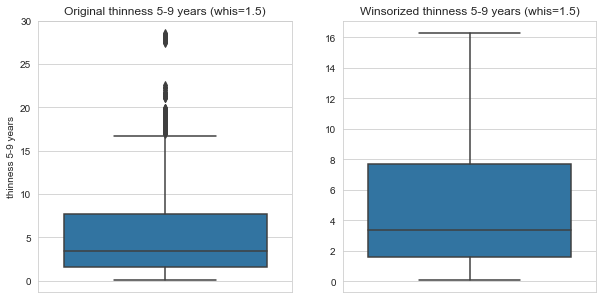

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["thinness 5-9 years"], orient = 'v')
plt.title("Original thinness 5-9 years (whis=1.5)")
winsorized_thin_5_9 = winsorize(lifeexpect_df["thinness 5-9 years"], (0, 0.04))
plt.subplot(1,2,2)
sns.boxplot(winsorized_thin_5_9, orient = 'v')
plt.title("Winsorized thinness 5-9 years (whis=1.5)")
plt.show()

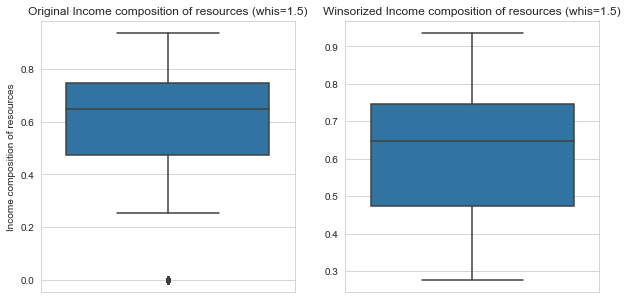

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Income composition of resources"], orient = 'v')
plt.title("Original Income composition of resources (whis=1.5)")
winsorized_Income = winsorize(lifeexpect_df["Income composition of resources"], (0.05, 0))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Income, orient = 'v')
plt.title("Winsorized Income composition of resources (whis=1.5)")
plt.show()

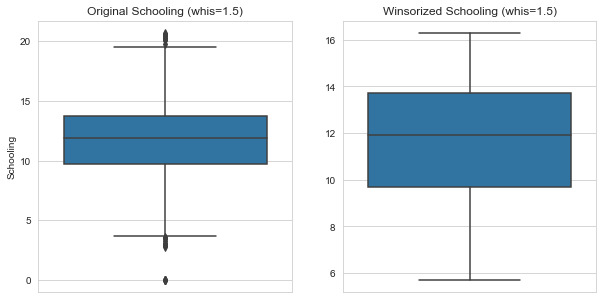

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(lifeexpect_df["Schooling"], orient = 'v')
plt.title("Original Schooling (whis=1.5)")
winsorized_Schooling = winsorize(lifeexpect_df["Schooling"], (0.05, 0.05))
plt.subplot(1,2,2)
sns.boxplot(winsorized_Schooling, orient = 'v')
plt.title("Winsorized Schooling (whis=1.5)")
plt.show()

In [38]:
lifeexpect_df['winsorize_Life expectancy'] = winsorized_lifeExp
lifeexpect_df['winsorize_Adult Mortality'] = winsorized_AdultMort
lifeexpect_df['winsorize_infant deaths'] = winsorized_infantDeath
lifeexpect_df['winsorize_Alcohol'] = winsorized_Alcohol
lifeexpect_df['winsorize_percentage expenditure'] = winsorized_Expenditure
lifeexpect_df['winsorize_Hepatitis B'] = winsorized_HepB
lifeexpect_df['winsorize_BMI'] = winsorized_BMI
lifeexpect_df['winsorize_under-five deaths'] = winsorized_underFive
lifeexpect_df['winsorize_Polio'] = winsorized_Polio
lifeexpect_df['winsorize_Total expenditure'] = winsorized_TotExpenditure
lifeexpect_df['winsorize_Diphtheria'] = winsorized_Diphtheria
lifeexpect_df['winsorize_HIV/AIDS'] = winsorized_HIV
lifeexpect_df['winsorize_GDP'] = winsorized_GDP
lifeexpect_df['winsorize_Population'] = winsorized_Popu
lifeexpect_df['winsorize_thinness  1-19 years'] = winsorized_thin_1_19
lifeexpect_df['winsorize_thinness 5-9 years'] = winsorized_thin_5_9
lifeexpect_df['winsorize_Income composition of resources'] = winsorized_Income
lifeexpect_df['winsorize_Schooling'] = winsorized_Schooling

In [39]:
lifeexpect_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,winsorize_Polio,winsorize_Total expenditure,winsorize_Diphtheria,winsorize_HIV/AIDS,winsorize_GDP,winsorize_Population,winsorize_thinness 1-19 years,winsorize_thinness 5-9 years,winsorize_Income composition of resources,winsorize_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,46.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5


# Data Exploration

## Univariate Analysis

We have 1987 entries with respect to 39 variables.

36 numerical (continuous) variables.
3 categorical variables. Year is considered as categorical value.

In [40]:
# Taking numerical columns
columnList = ['Life expectancy',
 'winsorize_Life expectancy',
 'Adult Mortality',
 'winsorize_Adult Mortality',
 'infant deaths',
 'winsorize_infant deaths',
 'Alcohol',
 'winsorize_Alcohol',
 'percentage expenditure',
 'winsorize_percentage expenditure', 
 'Hepatitis B',
 'winsorize_Hepatitis B',
 'BMI',
 'winsorize_BMI',
 'under-five deaths',
 'winsorize_under-five deaths',
 'Polio',
 'winsorize_Polio',
 'Total expenditure',
 'winsorize_Total expenditure',
 'Diphtheria',
 'winsorize_Diphtheria',
 'HIV/AIDS',
 'winsorize_HIV/AIDS',
 'GDP',
 'winsorize_GDP',
 'Population',
 'winsorize_Population',
 'thinness  1-19 years',
 'winsorize_thinness  1-19 years',
 'thinness 5-9 years',
 'winsorize_thinness 5-9 years',
 'Income composition of resources',
 'winsorize_Income composition of resources',
 'Schooling',
 'winsorize_Schooling']

In [41]:
lifeexpect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 39 columns):
Country                                      1987 non-null object
Year                                         1987 non-null int64
Status                                       1987 non-null object
Life expectancy                              1987 non-null float64
Adult Mortality                              1987 non-null float64
infant deaths                                1987 non-null int64
Alcohol                                      1987 non-null float64
percentage expenditure                       1987 non-null float64
Hepatitis B                                  1987 non-null float64
BMI                                          1987 non-null float64
under-five deaths                            1987 non-null int64
Polio                                        1987 non-null float64
Total expenditure                            1987 non-null float64
Diphtheria                    

In [42]:
# get univariate statistics
lifeexpect_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,...,winsorize_Polio,winsorize_Total expenditure,winsorize_Diphtheria,winsorize_HIV/AIDS,winsorize_GDP,winsorize_Population,winsorize_thinness 1-19 years,winsorize_thinness 5-9 years,winsorize_Income composition of resources,winsorize_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,36.428636,50.932562,80.371917,...,83.145445,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.650226
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,19.736138,188.933117,24.363376,...,17.144328,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,2.931304
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,1.400000,0.000000,3.000000,...,46.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,5.700000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,18.150000,1.000000,74.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,38.700000,4.000000,91.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,55.000000,36.000000,96.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,77.100000,2500.000000,99.000000,...,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,16.300000


In [43]:
# descriptive statistics for just text-based variables
lifeexpect_df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Afghanistan,Developing
freq,16,1702


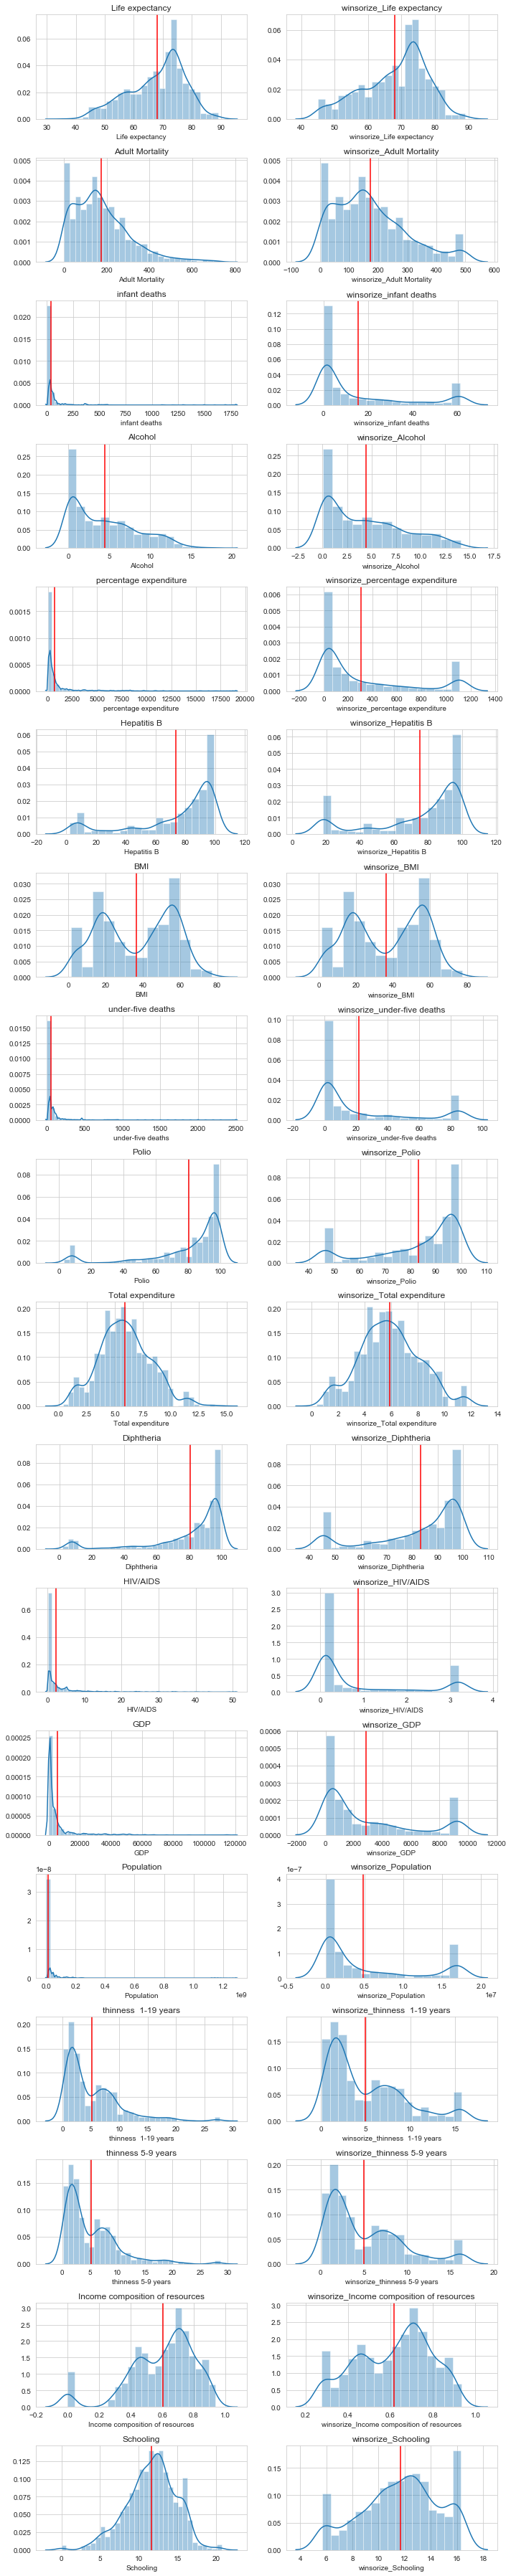

In [44]:
# Plotting Boxplots for every columns
plt.figure(figsize=(10,50))
for i in range(len(columnList)):
    plt.subplot(18,2,i+1)
    sns.distplot(lifeexpect_df["%s" % columnList[i]])
    plt.axvline(np.mean(lifeexpect_df["%s" % columnList[i]]), color = 'r')
    plt.title(columnList[i])
plt.tight_layout()
plt.show()

Total expenditure, income composition of resource, and Schooling is somewhat following the Normal distribution. Most of the variable are following the bimodal or multimodal distribution and highly skewed to right side.

If we compare the means of the original and the winsorized variables above, we can notice the most of variables have the difference. That means the outliers could affect to descriptive statistics such as mean or median. In this analysis, we will use winsorized version of data.

## Multivariate Analysis

In [45]:
lifeexpect_df_win = lifeexpect_df.iloc[:,21:]
lifeexpect_df_win['Country'] = lifeexpect_df['Country']
lifeexpect_df_win['Year'] = lifeexpect_df['Year']
lifeexpect_df_win['Status'] = lifeexpect_df['Status']

Text(0.5, 1.0, 'Life expectancy vs Schooling')

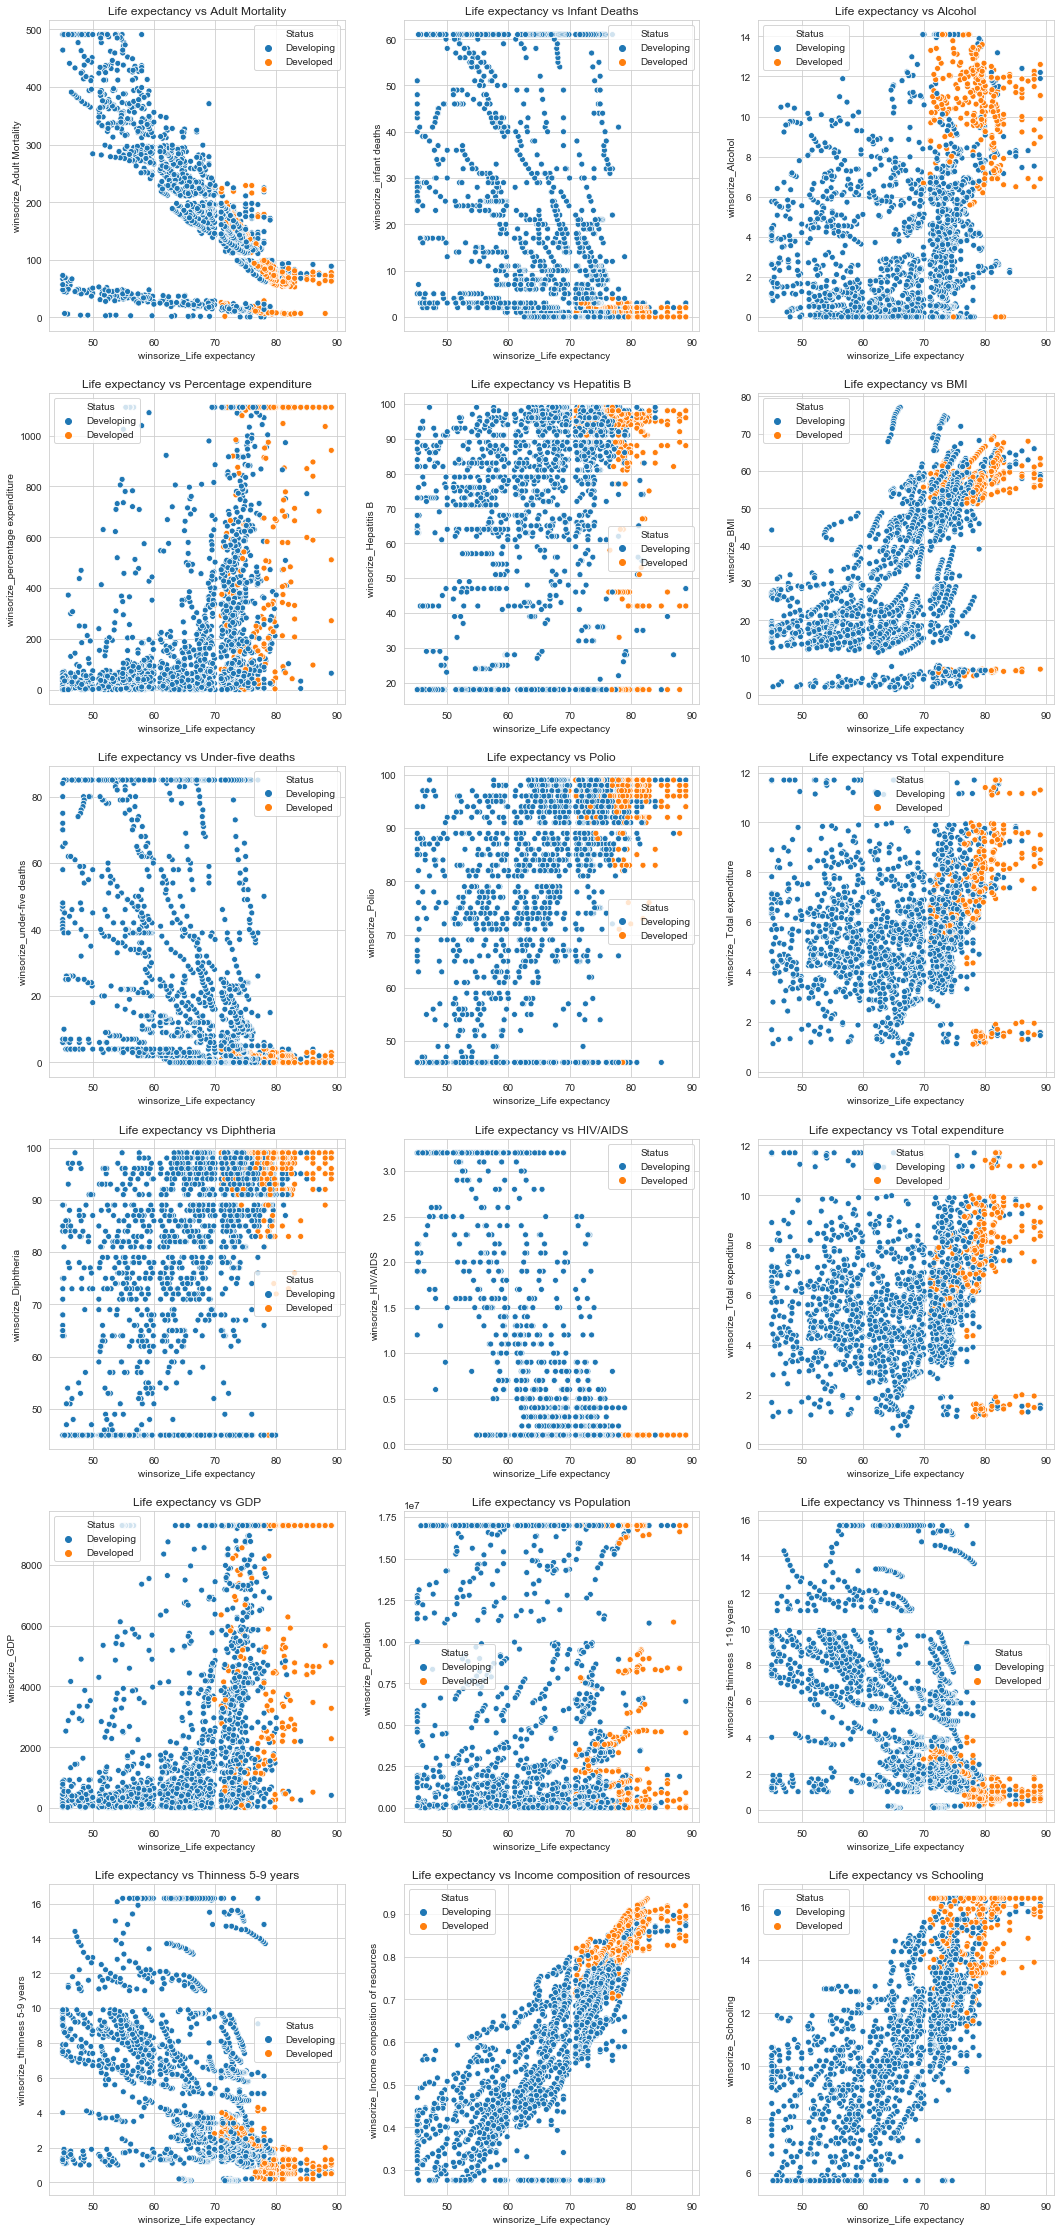

In [46]:
plt.figure(figsize=(18,40))
plt.subplot(6,3,1)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Adult Mortality'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Adult Mortality")

plt.subplot(6,3,2)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_infant deaths'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Infant Deaths")

plt.subplot(6,3,3)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Alcohol'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Alcohol")

plt.subplot(6,3,4)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_percentage expenditure'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Percentage expenditure")

plt.subplot(6,3,5)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Hepatitis B'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Hepatitis B")

plt.subplot(6,3,6)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_BMI'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs BMI")

plt.subplot(6,3,7)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_under-five deaths'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Under-five deaths")

plt.subplot(6,3,8)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Polio'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Polio")

plt.subplot(6,3,9)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Total expenditure'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Total expenditure")

plt.subplot(6,3,10)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Diphtheria'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Diphtheria")

plt.subplot(6,3,11)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_HIV/AIDS'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs HIV/AIDS")

plt.subplot(6,3,12)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Total expenditure'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Total expenditure")

plt.subplot(6,3,13)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_GDP'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs GDP")

plt.subplot(6,3,14)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Population'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Population")

plt.subplot(6,3,15)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_thinness  1-19 years'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Thinness 1-19 years")

plt.subplot(6,3,16)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_thinness 5-9 years'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Thinness 5-9 years")

plt.subplot(6,3,17)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Income composition of resources'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Income composition of resources")

plt.subplot(6,3,18)
sns.scatterplot(lifeexpect_df_win['winsorize_Life expectancy'], lifeexpect_df_win['winsorize_Schooling'], hue = lifeexpect_df_win['Status'])
plt.title("Life expectancy vs Schooling")

In [47]:
lifeexpect_df_win.columns

Index(['winsorize_Life expectancy', 'winsorize_Adult Mortality',
       'winsorize_infant deaths', 'winsorize_Alcohol',
       'winsorize_percentage expenditure', 'winsorize_Hepatitis B',
       'winsorize_BMI', 'winsorize_under-five deaths', 'winsorize_Polio',
       'winsorize_Total expenditure', 'winsorize_Diphtheria',
       'winsorize_HIV/AIDS', 'winsorize_GDP', 'winsorize_Population',
       'winsorize_thinness  1-19 years', 'winsorize_thinness 5-9 years',
       'winsorize_Income composition of resources', 'winsorize_Schooling',
       'Country', 'Year', 'Status'],
      dtype='object')

Text(0.5, 1.0, 'correlation matrix (Youtube)')

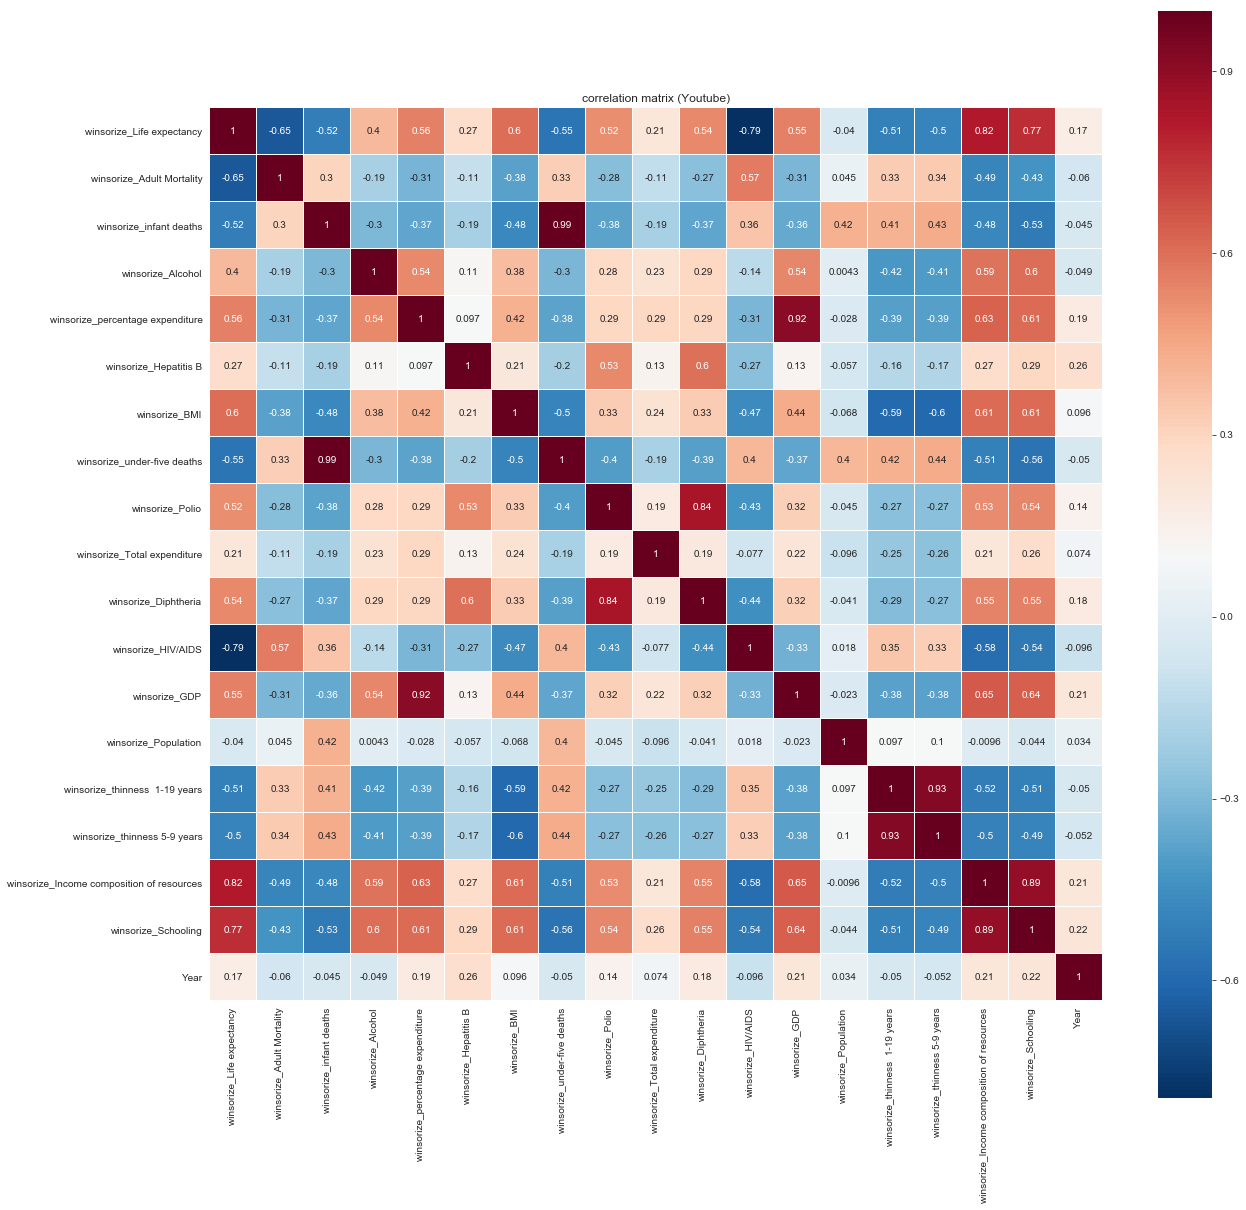

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(lifeexpect_df_win.corr(), square=True, annot=True, linewidths=.5, cmap = "RdBu_r" )
plt.title("correlation matrix (Youtube)")

According to the scatter plots and the heat map, **Life expectancy** is positively correlated with the **income composition of resources (0.82) and schooling (0.77)** and negatively correlated with **Adult Mortality (-0.65) and HIV/AIDS (-0.79)**.

## Bivariate analysis of  a continuous-categorical pair

### Difference the life expectancy between developed countries and  developing countries

In [49]:
lifeexpect_df_win.groupby('Status').mean()

,winsorize_Life expectancy,winsorize_Adult Mortality,winsorize_infant deaths,winsorize_Alcohol,winsorize_percentage expenditure,winsorize_Hepatitis B,winsorize_BMI,winsorize_under-five deaths,winsorize_Polio,winsorize_Total expenditure,winsorize_Diphtheria,winsorize_HIV/AIDS,winsorize_GDP,winsorize_Population,winsorize_thinness 1-19 years,winsorize_thinness 5-9 years,winsorize_Income composition of resources,winsorize_Schooling,Year
Status,,,,,,,,,,,,,,,,,,,
Developed,78.831579,83.094737,0.782456,10.360526,771.066308,82.554386,52.891228,0.968421,94.364912,7.140175,94.477193,0.100000,6570.832997,4.512557e+06,1.377895,1.394035,0.839730,15.236842,2007.000000
Developing,66.187368,187.277321,17.967098,3.452770,228.511363,73.708578,33.671974,25.216216,81.266745,5.687045,81.341951,1.003702,2244.130881,4.847862e+06,5.554642,5.631845,0.578703,11.049647,2006.982374


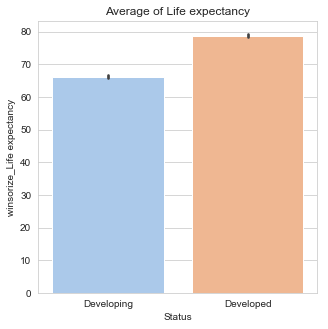

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(lifeexpect_df_win['Status'], lifeexpect_df_win['winsorize_Life expectancy'], palette='pastel')
plt.title("Average of Life expectancy")
plt.show()

The average life expectancy of developed countries (78.83) is larger than in developing countries (66.19).

### Yearly Change of Life Expectancy

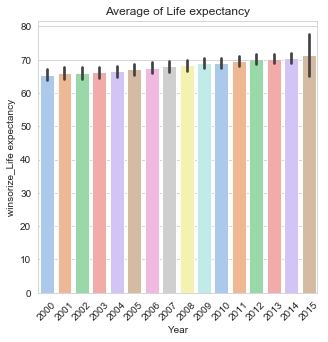

In [51]:
plt.figure(figsize=(5,5))
sns.barplot(lifeexpect_df_win['Year'], lifeexpect_df_win['winsorize_Life expectancy'], palette='pastel')
plt.title("Average of Life expectancy")
plt.xticks(rotation=45)
plt.title("Average of Life expectancy")
plt.show()

The average life expectancy is increasing by the year.

### Average life expectancy in each country

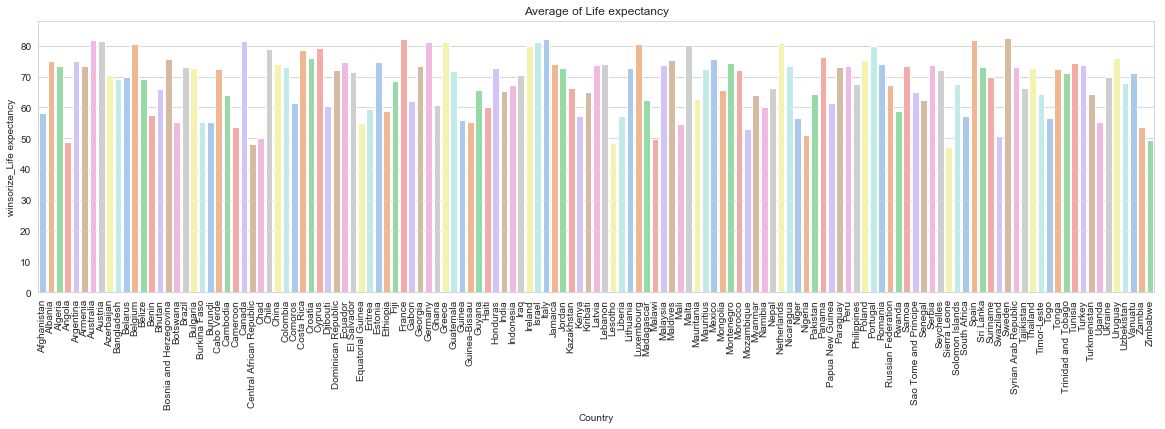

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(lifeexpect_df_win['Country'], lifeexpect_df_win['winsorize_Life expectancy'], errwidth=0 , palette='pastel')
plt.title("Average of Life expectancy")
plt.xticks(rotation=90)
plt.title("Average of Life expectancy")
plt.show()

In [53]:
top10 = lifeexpect_df_win.groupby('Country').mean().nlargest(10, 'winsorize_Life expectancy').reset_index()
bottom10 = lifeexpect_df_win.groupby('Country').mean().nsmallest(10, 'winsorize_Life expectancy').reset_index()

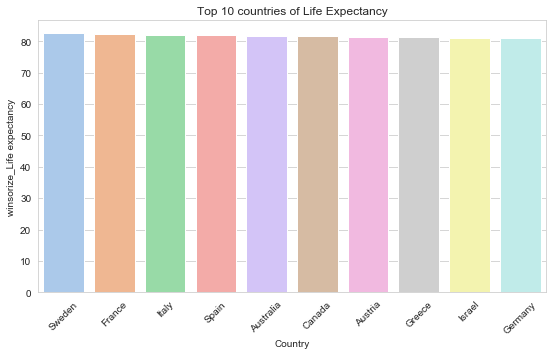

In [54]:
# top 10 countries
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(top10['Country'], top10['winsorize_Life expectancy'], palette='pastel')
plt.xticks(rotation=45)
plt.title("Top 10 countries of Life Expectancy")
plt.show()

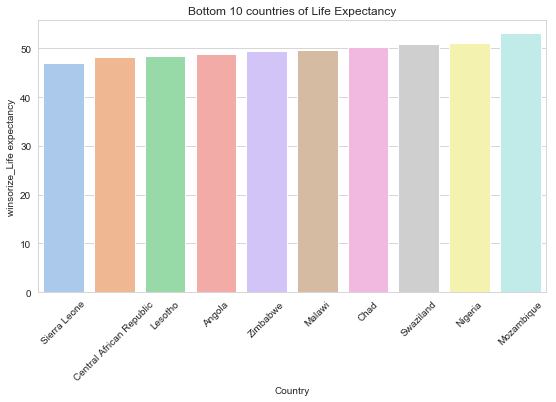

In [55]:
# bottom 10 countries
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(bottom10['Country'], bottom10['winsorize_Life expectancy'], palette='pastel')
plt.xticks(rotation=45)
plt.title("Bottom 10 countries of Life Expectancy")
plt.show()

Sweden has the largest life expectancy level, whereas Sierra Leone has the smallest life expectancy.

# Feature Engineering

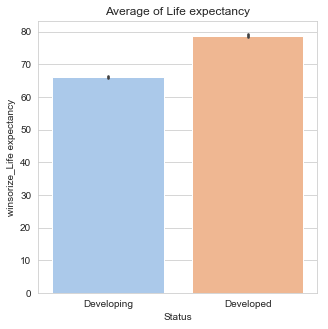

In [56]:
plt.figure(figsize=(5,5))
sns.barplot(lifeexpect_df_win['Status'], lifeexpect_df_win['winsorize_Life expectancy'], palette='pastel')
plt.title("Average of Life expectancy")
plt.show()

In [57]:
from scipy import stats
rvs1 = lifeexpect_df_win[lifeexpect_df_win['Status'] == 'Developing']['winsorize_Life expectancy']
rvs2 = lifeexpect_df_win[lifeexpect_df_win['Status'] == 'Developed']['winsorize_Life expectancy']
tStat, pVal = stats.ttest_ind(rvs1,rvs2)
print("T-statistic is {} and p-value is {}".format(tStat,pVal))

T-statistic is -23.02232052151534 and p-value is 3.793119218299665e-104


"Life expectancy" between Developed and Developing countries is significantly different. The variable **"Status"** also considered as a feature as it is related to Life Expectancy.

In [58]:
lifeexpect_df_win['Developed'] = pd.get_dummies(lifeexpect_df_win['Status'])['Developed']
lifeexpect_df_win['Developing'] = pd.get_dummies(lifeexpect_df_win['Status'])['Developing']

According to the research above, we identified that **Life expectancy** is positively correlated with the **income composition of resources (0.82) and schooling (0.77)** and negatively correlated with **Adult Mortality (-0.65) and HIV/AIDS (-0.79)**.

However, Income composition of resources and Schooling are highly correlated (corr = 0.89), so we will **drop the variable "schooling"** based on its correlation with life expectancy (corr = 0.77).

## Feature Dataframe

In [59]:
feature_df = lifeexpect_df_win[['Status', 'winsorize_Life expectancy', 'winsorize_HIV/AIDS', 'winsorize_Income composition of resources', 'winsorize_Adult Mortality']]

In [60]:
feature_df['Developed'] = pd.get_dummies(lifeexpect_df_win['Status'])['Developed']
feature_df['Developing'] = pd.get_dummies(lifeexpect_df_win['Status'])['Developing']

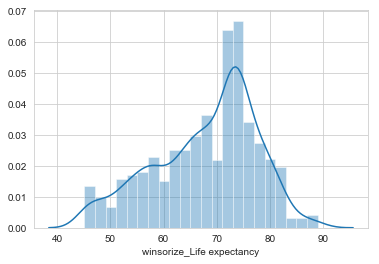

In [61]:
sns.distplot(feature_df['winsorize_Life expectancy'])

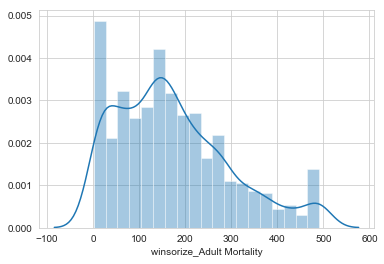

In [62]:
sns.distplot(feature_df['winsorize_Adult Mortality'])

## Dealing with non normality

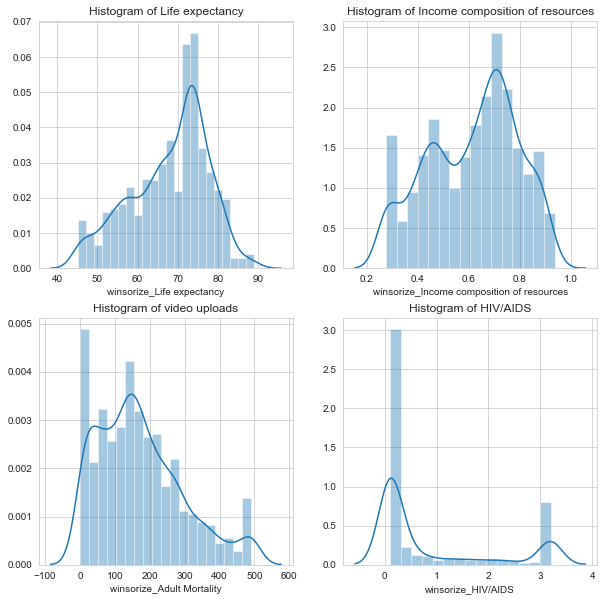

In [63]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.distplot(feature_df['winsorize_Life expectancy'])
plt.title("Histogram of Life expectancy")

plt.subplot(2, 2, 2)
sns.distplot(feature_df['winsorize_Income composition of resources'])
plt.title("Histogram of Income composition of resources")

plt.subplot(2, 2, 3)
sns.distplot(feature_df['winsorize_Adult Mortality'])
plt.title("Histogram of video uploads")

plt.subplot(2, 2, 4)
sns.distplot(feature_df['winsorize_HIV/AIDS'])
plt.title("Histogram of HIV/AIDS")

plt.show()

The distributions of the variables "Life expectancy", "Income composition of resources" and "Adult Mortality" are closely resemble the normal distribution. However, they are not *exactly* normally distributed. In case if "HIV/AIDS", it seems like the bimodal distribution.

## Jarque-Bera and Normality test 

In [64]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(feature_df['winsorize_Life expectancy'])
norm_stats = normaltest(feature_df['winsorize_Life expectancy'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(feature_df['winsorize_Income composition of resources'])
norm_stats = normaltest(feature_df['winsorize_Income composition of resources'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(feature_df['winsorize_Adult Mortality'])
norm_stats = normaltest(feature_df['winsorize_Adult Mortality'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(feature_df['winsorize_HIV/AIDS'])
norm_stats = normaltest(feature_df['winsorize_HIV/AIDS'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 100.89921922191272 and p value is 0.0
Normality test statistics is 103.35905279836736 and p value is 3.596390629775044e-23
Jarque-Bera test statistics is 93.5658395591581 and p value is 0.0
Normality test statistics is 278.98751202429037 and p value is 2.62199285545331e-61
Jarque-Bera test statistics is 195.1195823323171 and p value is 0.0
Normality test statistics is 156.82993052784016 and p value is 8.806701721192722e-35
Jarque-Bera test statistics is 491.2149287380957 and p value is 0.0
Normality test statistics is 321.0062603543962 and p value is 1.9695918378705263e-70


Every variable is not following the normal distribution based on Jarque-Bera test. Let's do boxcox transformation to make variables normally distributed.

## Box-Cox transformation

In [65]:
from scipy.stats import boxcox

life_expectancy_boxcox,_ = boxcox(feature_df['winsorize_Life expectancy'])
income_composition_boxcox,_ = boxcox(feature_df['winsorize_Income composition of resources'])
adult_mortality_boxcox,_ = boxcox(feature_df['winsorize_Adult Mortality'])
hiv_boxcox,_ = boxcox(feature_df['winsorize_HIV/AIDS'])

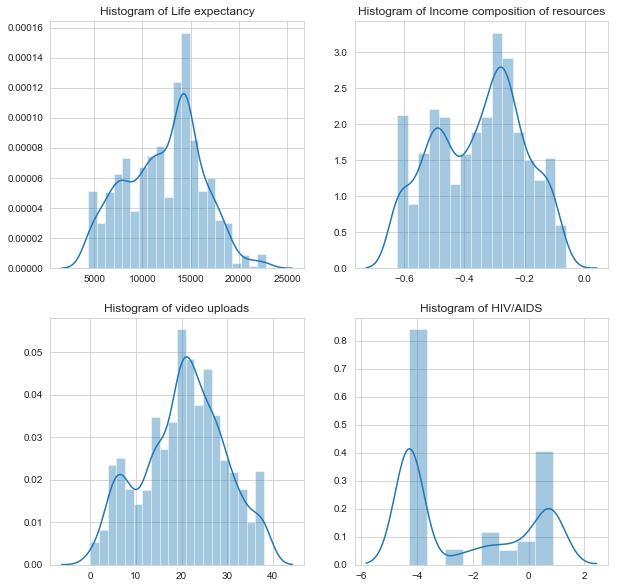

In [66]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.distplot(life_expectancy_boxcox)
plt.title("Histogram of Life expectancy")

plt.subplot(2, 2, 2)
sns.distplot(income_composition_boxcox)
plt.title("Histogram of Income composition of resources")

plt.subplot(2, 2, 3)
sns.distplot(adult_mortality_boxcox)
plt.title("Histogram of video uploads")

plt.subplot(2, 2, 4)
sns.distplot(hiv_boxcox)
plt.title("Histogram of HIV/AIDS")

plt.show()

In [67]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(life_expectancy_boxcox)
norm_stats = normaltest(life_expectancy_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(income_composition_boxcox)
norm_stats = normaltest(income_composition_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(adult_mortality_boxcox)
norm_stats = normaltest(adult_mortality_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(hiv_boxcox)
norm_stats = normaltest(hiv_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 31.20404660346231 and p value is 1.6754341891633828e-07
Normality test statistics is 61.29254840629835 and p value is 4.903342418346737e-14
Jarque-Bera test statistics is 83.85960816903423 and p value is 0.0
Normality test statistics is 367.22078558298574 and p value is 1.8155975606170345e-80
Jarque-Bera test statistics is 33.72822536939702 and p value is 4.742517245581723e-08
Normality test statistics is 62.16804594159616 and p value is 3.1650483473977165e-14
Jarque-Bera test statistics is 280.1557577789508 and p value is 0.0
Normality test statistics is 56.840682967168874 and p value is 4.541533477236685e-13


The variable life expectancy and adult mortality transformed into a normal distribution, however, the variables income composition and HIV/AIDS is still not normally distributed after applying transformation method.

## Standardize

Most machine learning model's assumption is the data is normally distributed and in a same range. Let's try to standardize the data using scale function.

In [68]:
from sklearn.preprocessing import scale

feature_df['scaled_Life expectancy'] = scale(feature_df['winsorize_Life expectancy'])
feature_df['scaled_Income composition of resources'] = scale(feature_df['winsorize_Income composition of resources'])
feature_df['scaled_Adult Mortality'] = scale(feature_df['winsorize_Adult Mortality'])
feature_df['scaled_HIV/AIDS'] = scale(feature_df['winsorize_HIV/AIDS'])

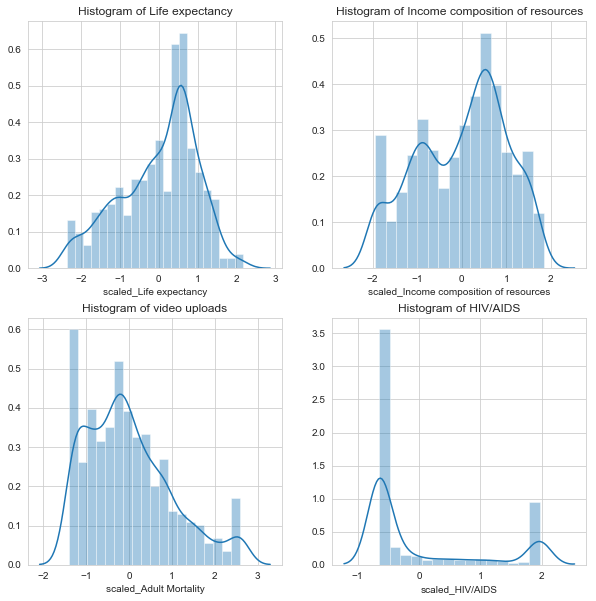

In [69]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.distplot(feature_df['scaled_Life expectancy'])
plt.title("Histogram of Life expectancy")

plt.subplot(2, 2, 2)
sns.distplot(feature_df['scaled_Income composition of resources'])
plt.title("Histogram of Income composition of resources")

plt.subplot(2, 2, 3)
sns.distplot(feature_df['scaled_Adult Mortality'])
plt.title("Histogram of video uploads")

plt.subplot(2, 2, 4)
sns.distplot(feature_df['scaled_HIV/AIDS'])
plt.title("Histogram of HIV/AIDS")

plt.show()

In [70]:
final_featureSet = feature_df[['Developed','Developing','scaled_Life expectancy','scaled_Income composition of resources','scaled_Adult Mortality','scaled_HIV/AIDS']]

In [71]:
final_featureSet.columns

Index(['Developed', 'Developing', 'scaled_Life expectancy',
       'scaled_Income composition of resources', 'scaled_Adult Mortality',
       'scaled_HIV/AIDS'],
      dtype='object')

# Summary

1. Our goal in this analysis is to identify the factors that affect the life expectancy. We need to find out which factors increase the expected life in the countries and which factors decrease it.

2. Life expectancy is slowly growing up by the year.

3. Sweden has the largest life expectancy level, whereas Sierra Leone has the smallest life expectancy.

4. According to the analysis, the development status of the country could affect Life expectancy (p < 0.05). 

5. Based on correlation analysis,  Life expectancy is positively correlated with the income composition of resources (0.82) and schooling (0.77) and negatively correlated with Adult Mortality (-0.65) and HIV/AIDS (-0.79).

6. However, Income composition of resources and Schooling are highly correlated (corr = 0.89), so we will exclude the variable "schooling" based on its correlation with life expectancy (corr = 0.77).

7. After Box-Cox transformation, the variable life expectancy and adult mortality transformed into a normal distribution, however, the variables income composition and HIV/AIDS is still not normally distributed after applying transformation method.

8. We obtain the features with the variables development status, income composition of resources, adult mortality, HIV/AIDS to explain Life expectancy.